## Background

Event Study Model

The equation to estimate the effect of the Truck Parking Accident (TPA) on the creation of truck stops is specified as follows:

$$
\Delta \text{Num\_Truck\_Stop}_{tj} = \sum_{i=-6}^{6} \beta_{ij} \text{TPA}_{ij} + \gamma X_{tj} + \epsilon_{tj}
$$

Where:

$\Delta\text{Num\_Truck\_Stop}_{tj}$ is the change in truck stop capacity in year $t$ for category $j$.

$\beta_i$ are the coefficients for the event dummies ($\text{TPA}_{i,j}$), where $i$ represents the relative year to the Truck Parking Accident ($i = -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6$).

$\text{TPA}_{i,j}$ is the event dummy indicating the presence of a Truck Parking Accident in relative year $i$ for category $j$. Specifically, when $i = 0$, this corresponds to the year in which the Truck Parking Accident occurs.

$\gamma$ represents the coefficients for the control variables ($X_{tj}$).

$X_{tj}$ are the control variables in year $t$ for category $j$.

$\epsilon_{tj}$ is the error term for year $t$ and category $j$.

$j$ indicates a specific category used to isolate subsets of the data.

To analyze the impact of the Truck Parking Accident across different zoning categories, I will estimate to each corresponding category:

Traditional: This category evaluates the effects in conventional settings with typical zoning regulations.

Exclusion: This category examines the impacts in areas where truck stops are limited or restricted by zoning laws.

Reform: This category focuses on regions undergoing policy or structural reforms related to truck parking.

Wild Wild Texas: This category investigates the unique circumstances and effects in Texas, a state known for its lack of zoning regulation.

To start, we will run a basic model without the categories 
$$
\Delta\text{Num\_Truck\_Stop}_{t} = \sum_{i=-6}^{6} \beta_{i} \text{TPA}_{i} + \gamma X_{t} + \epsilon_{t}
$$

The first step is to first figure out how to define what consittutes a note worthy truck parking accident. 

In [47]:
import pandas as pd

result_df = pd.read_csv(r'C:\Users\clint\Desktop\Research-Paper-Trucks\Initial Proposal\result_df.csv')
county_change_df = pd.read_csv(r'C:\Users\clint\Desktop\Research-Paper-Trucks\Data\entry_exit\COUNTY_change.csv')
result_df

,CRASH_ID,REPORT_STATE,REPORT_DATE,REPORT_SEQ_NO,LOCATION,CITY_CODE,CITY,STATE,COUNTY_CODE,VEHICLES_IN_ACCIDENT,FATALITIES,INJURIES,CRASH_EVENT_SEQ_ID_DESC
0,4860792,CA,20241017,1,34.441682 / -118.568696,NaN,SANTA CLARITA,CA,37.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
1,4860781,CA,20241117,1,ANNADALE AV / 26 FT W J ST,NaN,SANGER,CA,19.0,2.0,0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
2,4860550,ID,20241206,2,DIVIDE CREEK,NaN,MERIDIAN,ID,1.0,2.0,0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
3,4860541,ID,20241122,1,BEST BUSINESS AVE,NaN,KUNA,ID,1.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
4,4860302,IL,20241205,2,S WEST ST,NaN,Olney Twp,IL,159.0,4.0,0,0,2:14:COLLISION INVOLVING PARKED MOTOR VEHICLE;...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46313,16220,SD,19970923,1,6TH ST,NaN,SIOUX FALLS,SD,99.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
46314,16111,SD,20000716,1,I-90,NaN,RURAL,SD,93.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
46315,16017,SD,20010203,1,I-29,NaN,RURAL,SD,99.0,7.0,0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
46316,15968,SD,19990120,1,I-90,NaN,RURAL,SD,99.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE


We observe our summary statistics

In [48]:
summary_statistics = result_df[['VEHICLES_IN_ACCIDENT', 'FATALITIES', 'INJURIES']].describe()

# Calculate the value corresponding to z-score = 2
z_score_2_values = summary_statistics.loc['mean'] + 2 * summary_statistics.loc['std']

# Display the summary statistics and z-score = 2 values
summary_statistics.loc['z_score_2'] = z_score_2_values
summary_statistics

,VEHICLES_IN_ACCIDENT,FATALITIES,INJURIES
count,46230.000000,46318.000000,46318.000000
mean,2.302336,0.046073,0.532925
std,1.030429,0.265857,1.019164
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000
max,58.000000,20.000000,35.000000
z_score_2,4.363195,0.577787,2.571253


We can define what a significant truck parkign accident is in many differnt ways. But I belive a z score>2 shoudl be sufficient for our purposes. It is also a standard to use zscore>2. To visualize what this represents please observe the followin gpltos. 

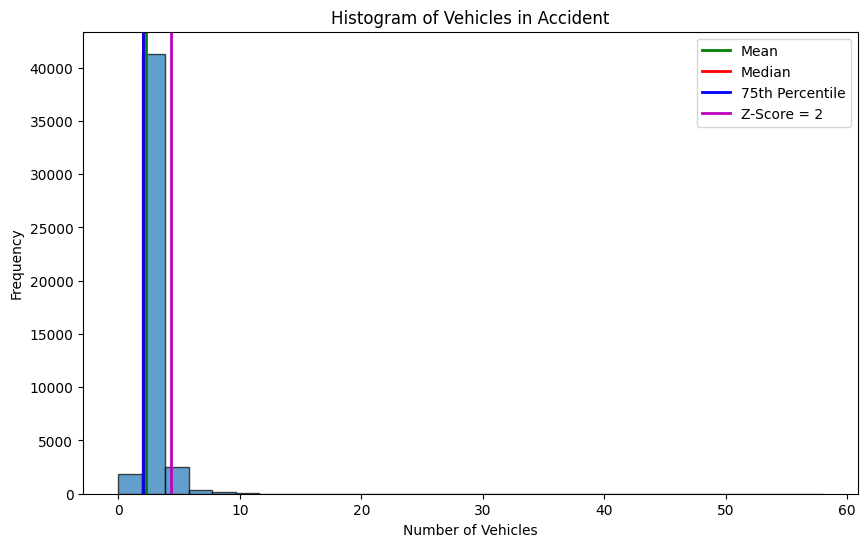

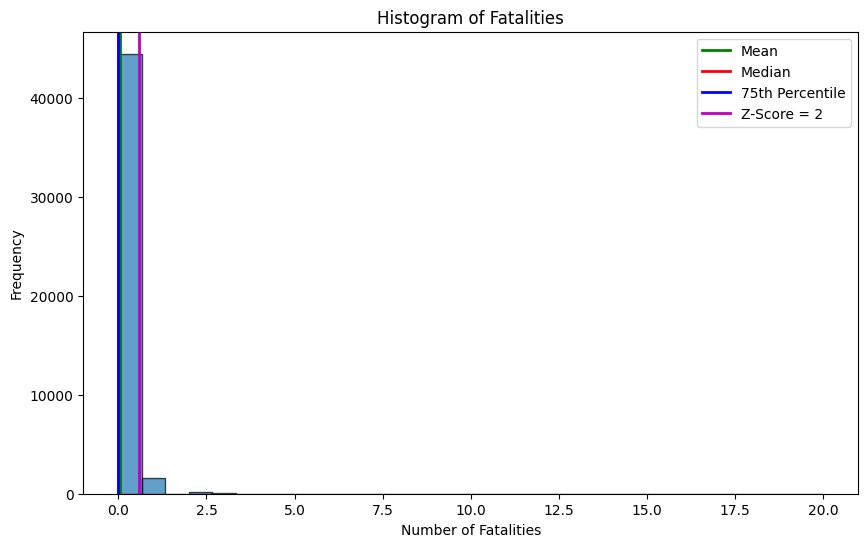

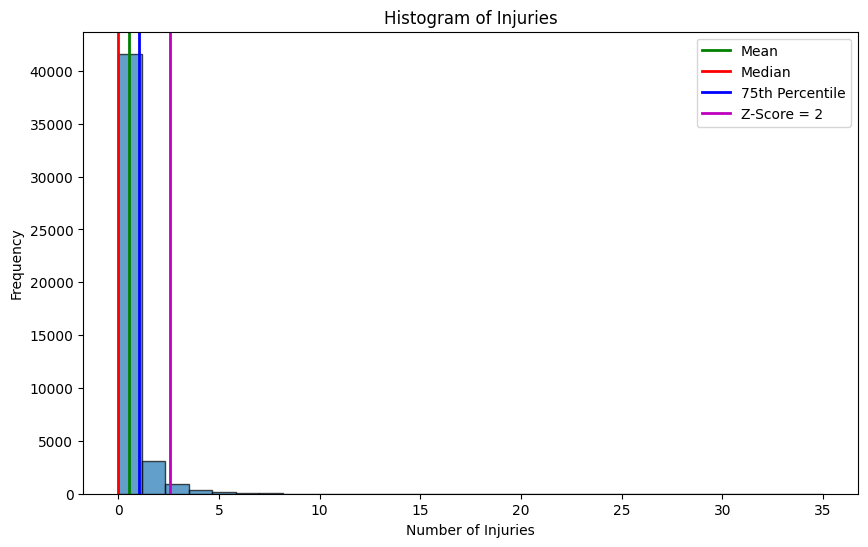

In [49]:
import matplotlib.pyplot as plt

# Plot histogram for VEHICLES_IN_ACCIDENT
plt.figure(figsize=(10, 6))
plt.hist(result_df['VEHICLES_IN_ACCIDENT'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.axvline(summary_statistics.loc['mean', 'VEHICLES_IN_ACCIDENT'], color='g', linestyle='-', linewidth=2, label='Mean')
plt.axvline(result_df['VEHICLES_IN_ACCIDENT'].median(), color='r', linestyle='-', linewidth=2, label='Median')
plt.axvline(result_df['VEHICLES_IN_ACCIDENT'].quantile(0.75), color='b', linestyle='-', linewidth=2, label='75th Percentile')
plt.axvline(summary_statistics.loc['z_score_2', 'VEHICLES_IN_ACCIDENT'], color='m', linestyle='-', linewidth=2, label='Z-Score = 2')
plt.title('Histogram of Vehicles in Accident')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot histogram for FATALITIES
plt.figure(figsize=(10, 6))
plt.hist(result_df['FATALITIES'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.axvline(summary_statistics.loc['mean', 'FATALITIES'], color='g', linestyle='-', linewidth=2, label='Mean')
plt.axvline(result_df['FATALITIES'].median(), color='r', linestyle='-', linewidth=2, label='Median')
plt.axvline(result_df['FATALITIES'].quantile(0.75), color='b', linestyle='-', linewidth=2, label='75th Percentile')
plt.axvline(summary_statistics.loc['z_score_2', 'FATALITIES'], color='m', linestyle='-', linewidth=2, label='Z-Score = 2')
plt.title('Histogram of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot histogram for INJURIES
plt.figure(figsize=(10, 6))
plt.hist(result_df['INJURIES'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.axvline(summary_statistics.loc['mean', 'INJURIES'], color='g', linestyle='-', linewidth=2, label='Mean')
plt.axvline(result_df['INJURIES'].median(), color='r', linestyle='-', linewidth=2, label='Median')
plt.axvline(result_df['INJURIES'].quantile(0.75), color='b', linestyle='-', linewidth=2, label='75th Percentile')
plt.axvline(summary_statistics.loc['z_score_2', 'INJURIES'], color='m', linestyle='-', linewidth=2, label='Z-Score = 2')
plt.title('Histogram of Injuries')
plt.xlabel('Number of Injuries')
plt.ylabel('Frequency')
plt.legend()
plt.show()

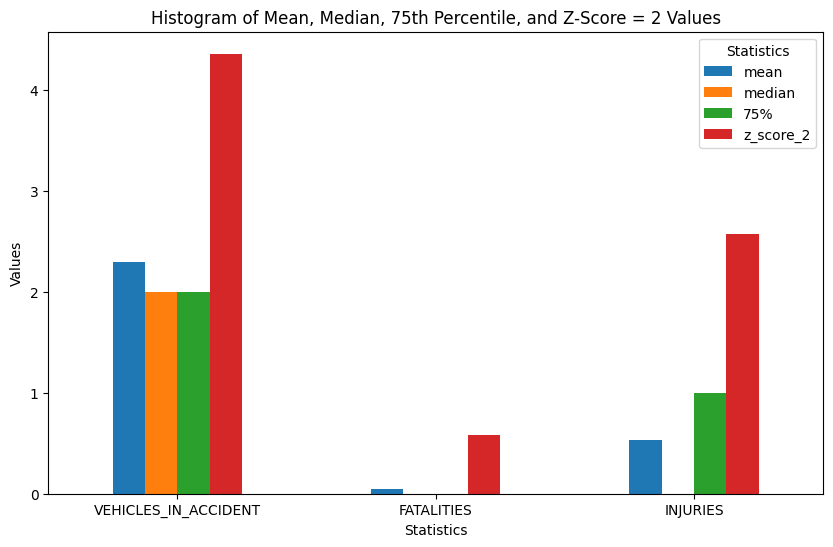

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming result_df is already defined and contains the necessary columns
summary_statistics = result_df[['VEHICLES_IN_ACCIDENT', 'FATALITIES', 'INJURIES']].describe()

# Calculate the value corresponding to z-score = 2
z_score_2_values = summary_statistics.loc['mean'] + 2 * summary_statistics.loc['std']

# Add z-score = 2 values to the summary statistics
summary_statistics.loc['z_score_2'] = z_score_2_values

# Extract the values for mean, median, 75th percentile, and z-score = 2
mean_values = summary_statistics.loc['mean']
median_values = summary_statistics.loc['50%']
percentile_75_values = summary_statistics.loc['75%']
z_score_2_values = summary_statistics.loc['z_score_2']

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'mean': mean_values,
    'median': median_values,
    '75%': percentile_75_values,
    'z_score_2': z_score_2_values
})

# Plot the histogram
plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Mean, Median, 75th Percentile, and Z-Score = 2 Values')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.legend(title='Statistics')
plt.show()

In [51]:
import pandas as pd

# Assuming result_df is your DataFrame
# Extract relevant columns
data = result_df[['VEHICLES_IN_ACCIDENT', 'FATALITIES', 'INJURIES']]

# Calculate mean and standard deviation for each column
means = data.mean()
stds = data.std()

# Calculate z-scores for each column
data_zscores = (data - means) / stds

# Add z-scores back to the original DataFrame
zscore_columns = [f'{col}_zscore' for col in data.columns]
for col, zscore_col in zip(data.columns, zscore_columns):
    result_df[zscore_col] = data_zscores[col]

# Filter rows where any z-score is greater than 2
result_df_filtered_z2 = result_df[(data_zscores > 2).any(axis=1)]

# Filter rows where any z-score corresponds to the 90th percentile (z > 1.28)
result_df_filtered_90th = result_df[(data_zscores > 1.28).any(axis=1)]

# Calculate thresholds for Z > 2
thresholds_z2 = means + 2 * stds

# Results
print("Original DataFrame with Z-Scores:")
print(result_df.head())

print("\nRows with Z-Scores > 2:")
print(result_df_filtered_z2.head())

print("\nRows with Z-Scores > 1.28 (90th Percentile):")
print(result_df_filtered_90th.head())

print("\nThresholds for Z > 2:")
thresholds_z2


Original DataFrame with Z-Scores:
   CRASH_ID REPORT_STATE  REPORT_DATE  REPORT_SEQ_NO  \
0   4860792           CA     20241017              1   
1   4860781           CA     20241117              1   
2   4860550           ID     20241206              2   
3   4860541           ID     20241122              1   
4   4860302           IL     20241205              2   

                     LOCATION  CITY_CODE           CITY STATE  COUNTY_CODE  \
0     34.441682 / -118.568696        NaN  SANTA CLARITA    CA         37.0   
1  ANNADALE AV / 26 FT W J ST        NaN         SANGER    CA         19.0   
2                DIVIDE CREEK        NaN       MERIDIAN    ID          1.0   
3           BEST BUSINESS AVE        NaN           KUNA    ID          1.0   
4                   S WEST ST        NaN      Olney Twp    IL        159.0   

   VEHICLES_IN_ACCIDENT  FATALITIES  INJURIES  \
0                   2.0           0         0   
1                   2.0           0         1   
2            

VEHICLES_IN_ACCIDENT    4.363195
FATALITIES              0.577787
INJURIES                2.571253
dtype: float64

In [52]:
result_df_filtered_z2

,CRASH_ID,REPORT_STATE,REPORT_DATE,REPORT_SEQ_NO,LOCATION,CITY_CODE,CITY,STATE,COUNTY_CODE,VEHICLES_IN_ACCIDENT,FATALITIES,INJURIES,CRASH_EVENT_SEQ_ID_DESC,VEHICLES_IN_ACCIDENT_zscore,FATALITIES_zscore,INJURIES_zscore
22,4859234,FL,20241205,1,STATE ROAD 52 (CLINTON AVE),NaN,UNINCORPORATED,FL,101.0,7.0,0,0,4:3:NONCOLLISION:OVERTURN (ROLLOVER);2:18:COLL...,4.558938,-0.173299,-0.522903
24,4859179,NY,20241205,3,Ref Marker:,NaN,NaN,NY,0.0,1.0,1,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE,-1.263877,3.588123,-0.522903
43,4858155,SC,20240513,1,W BUTLER RD,NaN,MAULDIN,SC,45.0,4.0,0,3,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE,1.647530,-0.173299,2.420684
87,4855020,MD,20240917,3,MD231 HALLOWING POINT RD,NaN,NaN,MD,9.0,5.0,1,2,4:14:COLLISION INVOLVING PARKED MOTOR VEHICLE;...,2.618000,3.588123,1.439488
88,4855019,MD,20240917,2,MD231 HALLOWING POINT RD,NaN,NaN,MD,9.0,5.0,1,2,4:14:COLLISION INVOLVING PARKED MOTOR VEHICLE;...,2.618000,3.588123,1.439488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46300,17655,TN,20000806,1,I 65 NB,0.0,OUTSIDE CITY LIMITS,TN,55.0,4.0,2,1,3:12:COLLISION INVOLVING PEDESTRIAN;2:14:COLLI...,1.647530,7.349545,0.458293
46301,17569,TN,19990614,2,I 40,0.0,OUTSIDE CITY LIMITS,TN,145.0,4.0,2,2,2:14:COLLISION INVOLVING PARKED MOTOR VEHICLE;...,1.647530,7.349545,1.439488
46302,17564,TN,19990603,4,I 40,0.0,OUTSIDE CITY LIMITS,TN,117.0,4.0,5,1,2:98:OTHER;1:14:COLLISION INVOLVING PARKED MOT...,1.647530,18.633811,0.458293
46315,16017,SD,20010203,1,I-29,NaN,RURAL,SD,99.0,7.0,0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE,4.558938,-0.173299,0.458293
